In [1]:
import os

from methods import main_methods as mm
import pyUSID_helpers as puh

import pyUSID as pu
import pycroscopy as px

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/wesleytatum/miniconda3/lib/python3.6/site-packages/pycroscopy/__init__.py:31: FutureWarning: Contents of pycroscopy.core such as hdf_utils, plot_utils have been moved to pyUSID but will continue to be available implicitly till the next release. Please update import statements to import such modules directly frompyUSID. See - https://pycroscopy.github.io/pycroscopy/whats_new.html under June 28 2018
  'pyUSID. See - https://pycroscopy.github.io/pycroscopy/whats_new.html under June 28 2018', FutureWarning)


In [2]:
qnm_in_path = "/Users/wesleytatum/Desktop/Grad School/Research/DIRECT_AFM/QNM/combined_npy/"
amfm_in_path = "/Users/wesleytatum/Desktop/Grad School/Research/DIRECT_AFM/AMFM/combined_npy/"
cafm_in_path = "/Users/wesleytatum/Desktop/Grad School/Research/DIRECT_AFM/cAFM/combined_npy/"

In [3]:
qnm_fields = ['Adhesion', 'Deformation', 'Dissipation', 'Height', 'Modulus', 'Stiffness']
amfm_fields = ['Height', 'Indentaiton', 'Modulus', 'Phase']
cafm_fields = ['Current', 'Height']

In [4]:
qnm_files = mm.get_all_paths(qnm_in_path)
amfm_files = mm.get_all_paths(amfm_in_path)
cafm_files = mm.get_all_paths(cafm_in_path)

qnm_files.sort()
amfm_files.sort()
cafm_files.sort()

In [5]:
for i in qnm_files:
    print (i)

/Users/wesleytatum/Desktop/Grad School/Research/DIRECT_AFM/QNM/combined_npy/Rieke_qnm.npy
/Users/wesleytatum/Desktop/Grad School/Research/DIRECT_AFM/QNM/combined_npy/Rieke_qnm_90.npy
/Users/wesleytatum/Desktop/Grad School/Research/DIRECT_AFM/QNM/combined_npy/WT2-107_qnm.npy
/Users/wesleytatum/Desktop/Grad School/Research/DIRECT_AFM/QNM/combined_npy/WT2-107_qnm_90.npy
/Users/wesleytatum/Desktop/Grad School/Research/DIRECT_AFM/QNM/combined_npy/WT2-97_qnm.npy
/Users/wesleytatum/Desktop/Grad School/Research/DIRECT_AFM/QNM/combined_npy/WT2-97_qnm_90.npy


In [6]:
p1_qnm = np.load(qnm_files[2])
print (p1_qnm.shape)

(512, 512, 6)


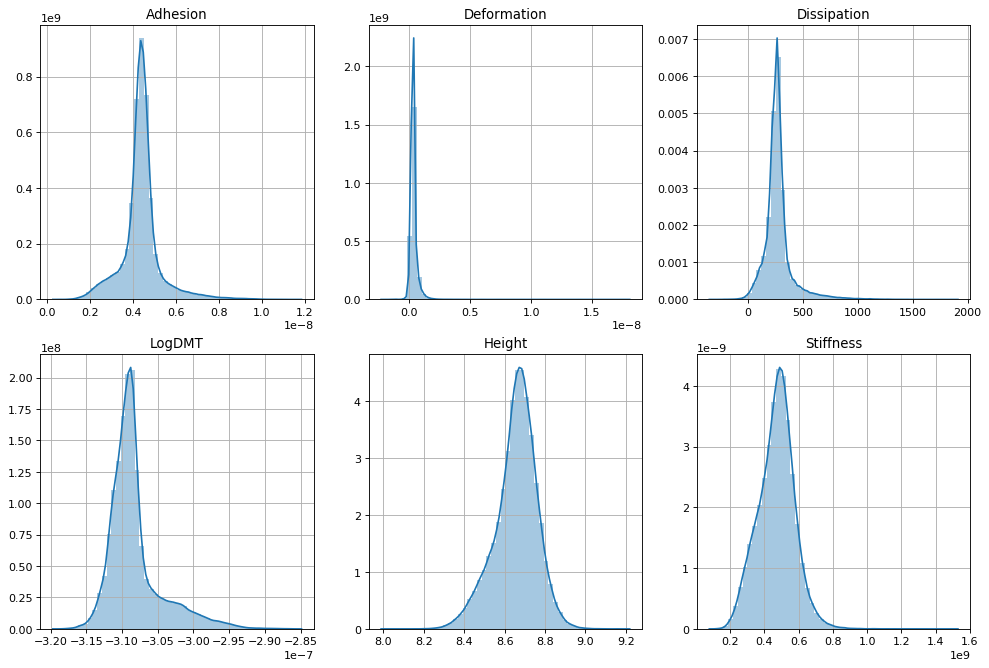

In [7]:
mm.show_property_distributions(p1_qnm, 6)

## Nanowires will automatically behave like outliers on the $SiO_{2}$ substrate.
## So, this part isn't necessary, but is included to test out functions

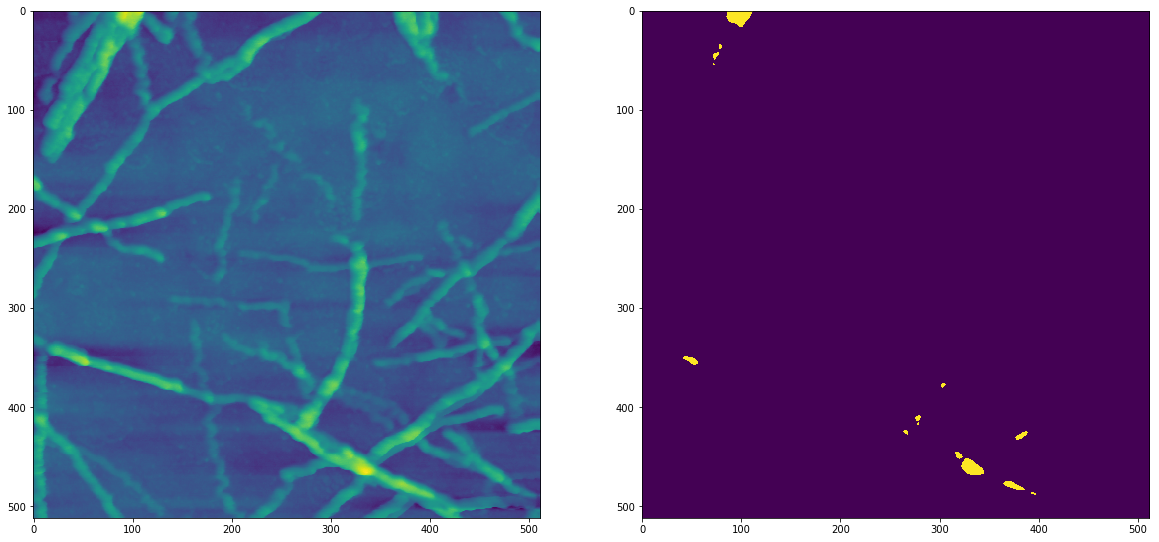

In [8]:
outliers = mm.extract_outliers(p1_qnm, height_index= 3, threshold= 4)

fig = plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(p1_qnm[:,:,3])
plt.subplot(122)
plt.imshow(outliers)

In [9]:
mm.segment(p1_qnm, outliers, num_components= 2)

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

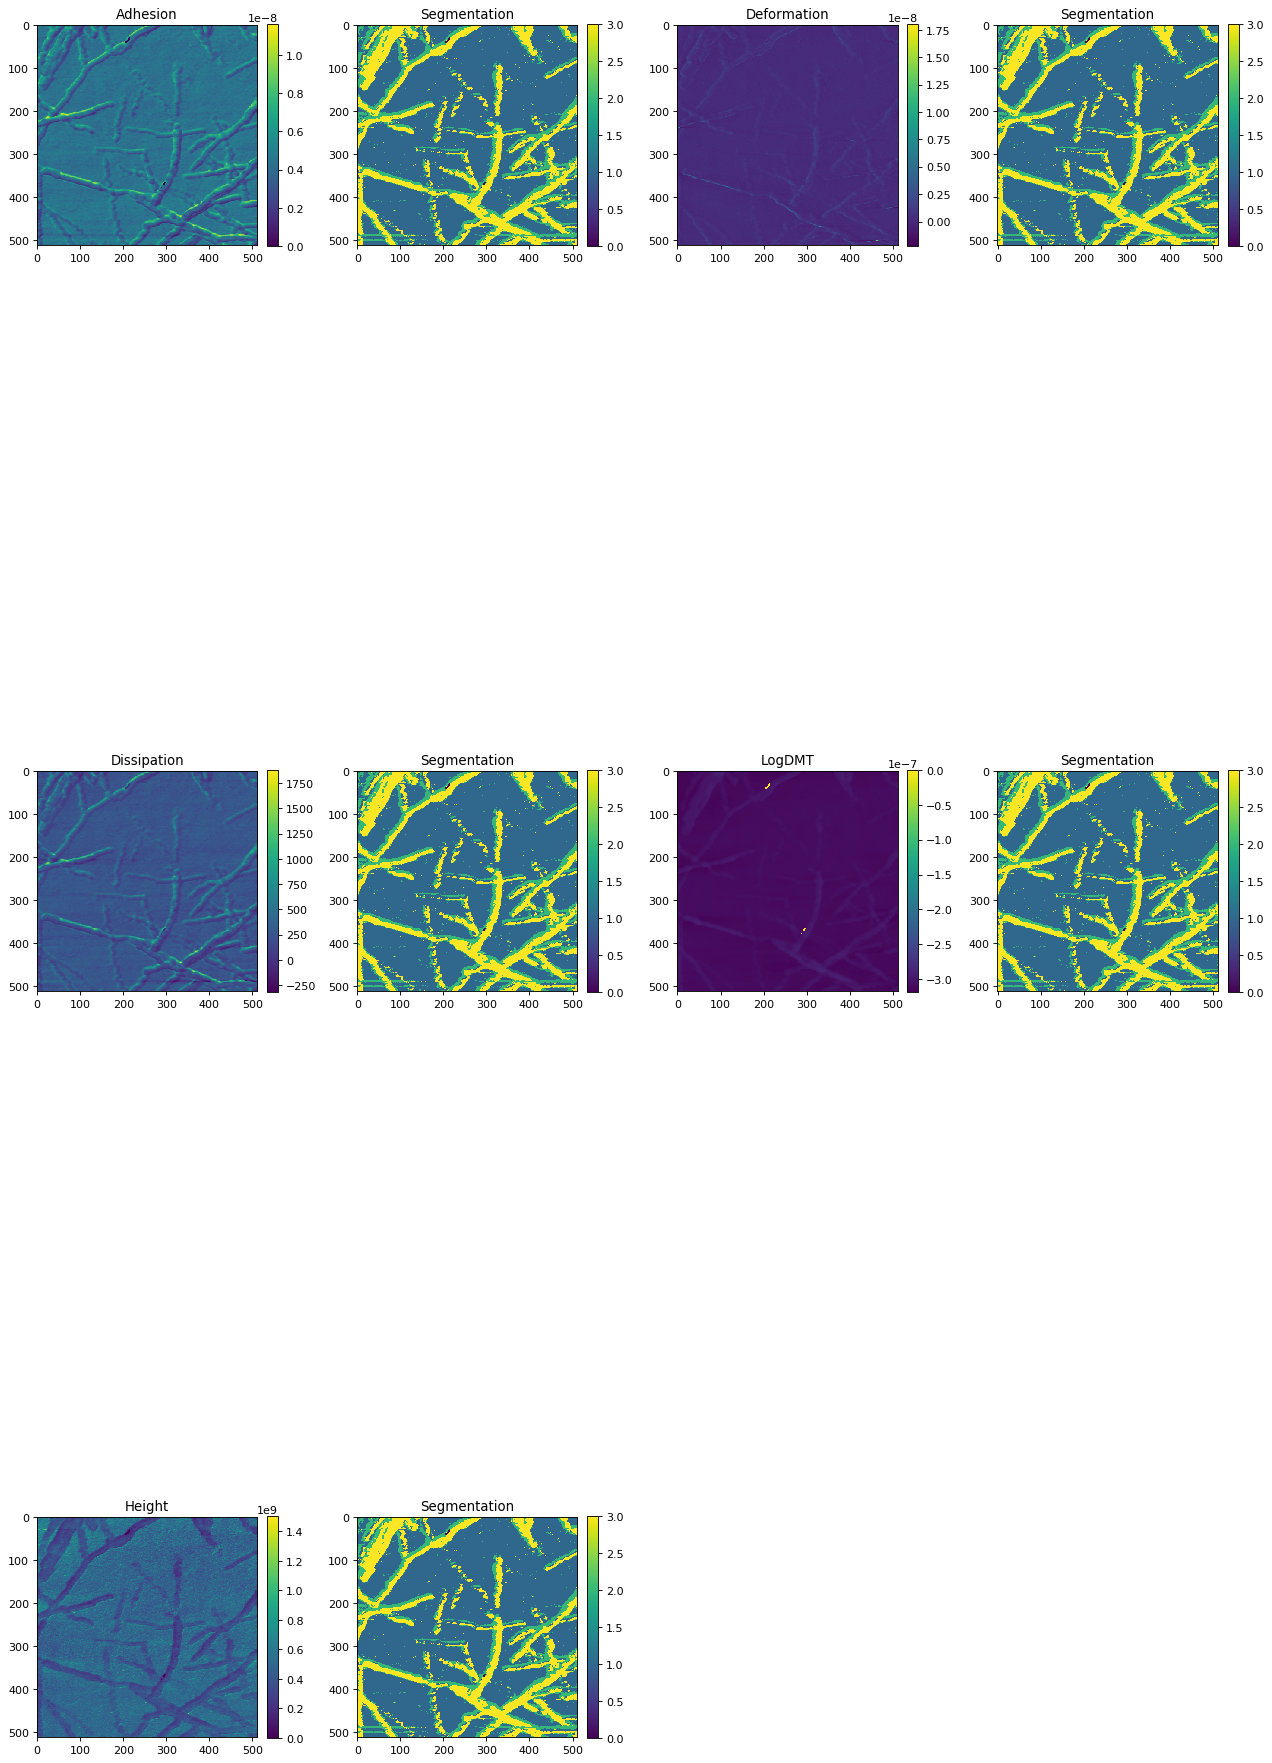

In [13]:
classifications, reduced_p1_qnm = mm.apply_segmentation(p1_qnm, threshold = 4)
mm.show_classification(classifications, reduced_p1_qnm)